In [1]:
import pandas as pd
import requests
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import scipy
from scipy import stats
cf.go_offline()

In [2]:
#pip install cufflinks

In [3]:
#pip install missingno

In [2]:
#collect data and transform data types
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df = df.drop(['cityid', 'dmaid','rowNumber'], axis=1)
df = df.replace("", np.nan)
df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)
df.tail(50)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
24901,7/29/2020 14:34:52,Intuit,Software Engineer 1,Software Engineer,138.0,"Mountain View, CA",0.0,0.0,Full Stack,115.0,13.0,10.0,Male,"Race: Asian, Academic Level: Master’s degree"
24902,7/29/2020 14:38:39,Twitter,SWE II,Software Engineer,215.0,"San Francisco, CA",4.0,3.0,Full Stack,157.0,38.0,20.0,Female,"Race: White, Academic Level: Master’s degree"
24903,7/29/2020 15:47:53,Microsoft,59,Hardware Engineer,139.0,"Raleigh, NC",0.0,0.0,silicon,94.0,30.0,15.0,NaN,NaN
24904,7/29/2020 15:49:27,The Home Depot,Software Engineer,Software Engineer,87.0,"Austin, TX",2.0,2.0,Full Stack,85.0,0.0,2.0,NaN,NaN
24905,7/29/2020 16:09:41,Capital One,Sr Associate,Product Manager,105.0,"Arlington, VA",3.0,3.0,Full Stack,97.0,0.0,5.0,Female,"Race: White, Academic Level: Bachelor’s degree"
24906,7/29/2020 16:33:36,Google,L4,Software Engineer,226.0,"Los Angeles, CA",6.0,1.0,Full Stack,144.0,60.0,22.0,Male,"Race: White, Academic Level: Master’s degree"
24907,7/29/2020 16:45:37,Microsoft,63,Product Designer,196.0,"Seattle, WA",6.0,1.0,ML / AI,160.0,20.0,16.0,Male,"Race: Asian, Academic Level: Master’s degree"
24908,7/29/2020 17:02:57,Intel,Grade 7,Hardware Engineer,162.0,"Hillsboro, OR",12.0,12.0,Distributed Systems (Back-End),127.0,14.0,21.0,Male,"Race: Asian, Academic Level: Master’s degree"
24909,7/29/2020 18:23:32,Intuit,Senior Software Engineer,Software Engineer,217.0,"Mountain View, CA",4.0,4.0,Mobile (iOS + Android),152.0,46.0,19.0,Male,"Race: Two or More Races, Academic Level: Bache..."
24910,7/29/2020 18:42:58,SquareSpace,PD2,Product Designer,140.0,"New York, NY",4.0,1.0,Design,122.0,18.0,0.0,Female,Academic Level: Bachelor’s degree


In [3]:
# Changing all null integer values to 0 and null string values to "No info"
df[['basesalary', 'stockgrantvalue', 'bonus']] = df[['basesalary', 'stockgrantvalue', 'bonus']].fillna(value=0)
df['tag'].fillna("no info", inplace=True)
df['gender'].fillna("no info", inplace=True)
df['otherdetails'].fillna("no info", inplace=True)
df.head(50)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127.0,"Redwood City, CA",1.5,1.5,no info,107.0,20.0,10.0,no info,no info
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100.0,"San Francisco, CA",5.0,3.0,no info,0.0,0.0,0.0,no info,no info
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310.0,"Seattle, WA",8.0,0.0,no info,155.0,0.0,0.0,no info,no info
3,6/13/2017 5:35:36,Uber,Senior,Software Engineer,578.0,"San Francisco, CA",10.0,2.0,no info,180000.0,1550000.0,9000.0,no info,Stock based on $48.65 per share.
4,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,200.0,"Redmond, WA",9.0,9.0,no info,169000.0,100000.0,30000.0,no info,no info
5,6/16/2017 10:44:01,Amazon,L5,Software Engineer,173.0,"Vancouver, BC, Canada",11.0,1.0,no info,120000.0,0.0,53000.0,no info,no info
6,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372.0,"Sunnyvale, CA",7.0,5.0,no info,157.0,180.0,35.0,no info,no info
7,6/18/2017 23:37:21,Facebook,E4,Software Engineer,270.0,"Menlo Park, CA",3.5,2.0,no info,160.0,0.0,0.0,no info,no info
8,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157.0,"Mountain View, CA",5.0,3.0,no info,0.0,0.0,0.0,no info,no info
9,6/20/2017 18:49:59,Amazon,L5,Software Engineer,190.0,"Seattle, WA",3.0,3.0,no info,110000.0,80000.0,0.0,no info,no info


In [4]:
# Removing whitespaces
def panda_strip(x):
    r =[]
    for y in x:
        if isinstance(y, str):
            y = y.strip()

        r.append(y)
    return pd.Series(r)

df = df.apply(lambda x: panda_strip(x))


In [5]:
df_filter = df['title'].isin(['Software Engineer','Data Scientist'])
df[df_filter]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100.0,"San Francisco, CA",5.0,3.0,no info,0.0,0.0,0.0,no info,no info
3,6/13/2017 5:35:36,Uber,Senior,Software Engineer,578.0,"San Francisco, CA",10.0,2.0,no info,180000.0,1550000.0,9000.0,no info,Stock based on $48.65 per share.
5,6/16/2017 10:44:01,Amazon,L5,Software Engineer,173.0,"Vancouver, BC, Canada",11.0,1.0,no info,120000.0,0.0,53000.0,no info,no info
7,6/18/2017 23:37:21,Facebook,E4,Software Engineer,270.0,"Menlo Park, CA",3.5,2.0,no info,160.0,0.0,0.0,no info,no info
8,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157.0,"Mountain View, CA",5.0,3.0,no info,0.0,0.0,0.0,no info,no info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,7/30/2020 11:57:48,Shopify,Software Developer,Software Engineer,145.0,"New York, NY",2.0,0.0,Web Development (Front-End),120.0,25.0,0.0,Female,"Remote, Race: White, Academic Level: Bachelor’..."
24947,7/30/2020 12:19:09,Twitch,L4,Software Engineer,140.0,"Los Angeles, CA",8.0,2.0,Full Stack,140.0,0.0,0.0,no info,no info
24948,7/30/2020 12:28:37,Oracle,IC-2,Software Engineer,220.0,"Seattle, WA",4.0,2.0,Distributed Systems (Back-End),135.0,75.0,10.0,Male,"Race: Asian, Academic Level: Master’s degree"
24949,7/30/2020 12:34:53,ByteDance,2-2,Software Engineer,400.0,"Mountain View, CA",7.0,0.0,ML / AI,200.0,150.0,50.0,no info,no info


In [6]:
#create Amazon dataframe
jobs_amazon = df.loc[df['company']=='Amazon']
jobs_google = df.loc[df['company']=='Google']
jobs_apple = df.loc[df['company']=='Apple']
jobs_facebook = df.loc[df['company']=='Facebook']
jobs_amazon = jobs_amazon.groupby('title',as_index = False)['yearsatcompany'].mean()
jobs_google = jobs_google.groupby('title',as_index = False)['yearsatcompany'].mean()
jobs_apple = jobs_apple.groupby('title',as_index = False)['yearsatcompany'].mean()
jobs_facebook = jobs_facebook.groupby('title',as_index = False)['yearsatcompany'].mean()

In [7]:
#jobs.iplot(kind='bar', x=['title'],y='yearsatcompany')
print("\n\033[1mAMAZON\n\033[0m")
print(jobs_amazon)
print("\n\033[1mGOOGLE\n\033[0m")
print(jobs_google)
print("\n\033[1mAPPLE\n\033[0m")
print(jobs_apple)
print("\n\033[1mMICROSOFT\n\033[0m")
print(jobs_microsoft)
print("\n\033[1mFACEBOOK\n\033[0m")
print(jobs_facebook)



AMAZON

                          title  yearsatcompany
0                Data Scientist        1.600826
1             Hardware Engineer        1.948718
2         Management Consultant        1.500000
3              Product Designer        2.110000
4               Product Manager        2.982181
5             Software Engineer        2.107085
6  Software Engineering Manager        4.107106
7            Solution Architect        2.009091
8     Technical Program Manager        3.209091

GOOGLE

                          title  yearsatcompany
0                Data Scientist        2.187500
1             Hardware Engineer        1.655172
2         Management Consultant        1.000000
3              Product Designer        2.125000
4               Product Manager        2.787037
5             Software Engineer        2.347562
6  Software Engineering Manager        3.495294
7            Solution Architect        3.354167
8     Technical Program Manager        2.800000

APPLE

              

NameError: name 'jobs_microsoft' is not defined

In [8]:
#pip install pandas_profiling

In [9]:
#missingno figures
msno.matrix(df, figsize=(12, 8))
df['timestamp'] = pd.to_datetime(df['timestamp'])
df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)
import pandas_profiling as pp
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
df = df[df['totalyearlycompensation'].between(df['totalyearlycompensation'].quantile(.05),df['totalyearlycompensation'].quantile(.95))]
profile.to_widgets()
# block off after 20 years of experience for both men and women 
# clean outliers

### Analyze influence of gender

In [11]:
#plot years of experience vs salary for men
men = df.loc[df['gender']=='Male']
highsal = df.loc[(df['totalyearlycompensation']>375) & (df['yearsofexperience']<5)]
men[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = men[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)
men = men.groupby('yearsofexperience',as_index = False)['totalyearlycompensation'].mean()
men.iplot(kind='line', x=['yearsofexperience'],y='totalyearlycompensation')
highsal = highsal.groupby('yearsofexperience',as_index = False)['totalyearlycompensation'].mean()
highsal.iplot(kind='line', x=['yearsofexperience'],y='totalyearlycompensation')
print(highsal)

   yearsofexperience  totalyearlycompensation
0                0.0               400.000000
1                1.0               387.250000
2                2.0               413.214286
3                3.0               410.269231
4                4.0               420.709091
5                4.5               390.000000


In [12]:
#plot years of experience vs salary for women
women = df.loc[df['gender']=='Female']
women[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = women[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)
women = women.groupby('yearsofexperience',as_index = False)['totalyearlycompensation'].mean()
women.iplot(kind='line', x=['yearsofexperience'],y='totalyearlycompensation')
print(women)

    yearsofexperience  totalyearlycompensation
0                0.00               164.235772
1                0.25               162.000000
2                1.00               162.094241
3                2.00               173.217544
4                2.50               240.000000
5                3.00               187.314516
6                4.00               203.831858
7                5.00               222.926108
8                6.00               219.525000
9                6.50               132.000000
10               7.00               227.504854
11               8.00               239.180952
12               9.00               274.285714
13              10.00               240.687500
14              11.00               241.206897
15              12.00               246.176471
16              13.00               244.605263
17              14.00               235.935484
18              15.00               271.403509
19              16.00               267.125000
20           

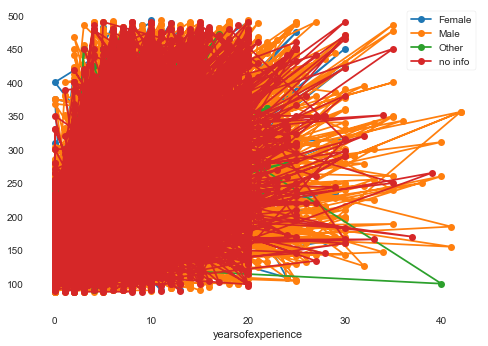

In [13]:
#plot years of experience vs salary by gender

fig, ax = plt.subplots()
for label, grp in df.groupby('gender'):
    grp.plot(x = 'yearsofexperience', y = 'totalyearlycompensation',marker="o",linestyle ="solid",ax = ax, label = label)


In [14]:
print(women)

    yearsofexperience  totalyearlycompensation
0                0.00               164.235772
1                0.25               162.000000
2                1.00               162.094241
3                2.00               173.217544
4                2.50               240.000000
5                3.00               187.314516
6                4.00               203.831858
7                5.00               222.926108
8                6.00               219.525000
9                6.50               132.000000
10               7.00               227.504854
11               8.00               239.180952
12               9.00               274.285714
13              10.00               240.687500
14              11.00               241.206897
15              12.00               246.176471
16              13.00               244.605263
17              14.00               235.935484
18              15.00               271.403509
19              16.00               267.125000
20           

In [15]:
women_array = np.array(women)
print(women_array)

[[0.00000000e+00 1.64235772e+02]
 [2.50000000e-01 1.62000000e+02]
 [1.00000000e+00 1.62094241e+02]
 [2.00000000e+00 1.73217544e+02]
 [2.50000000e+00 2.40000000e+02]
 [3.00000000e+00 1.87314516e+02]
 [4.00000000e+00 2.03831858e+02]
 [5.00000000e+00 2.22926108e+02]
 [6.00000000e+00 2.19525000e+02]
 [6.50000000e+00 1.32000000e+02]
 [7.00000000e+00 2.27504854e+02]
 [8.00000000e+00 2.39180952e+02]
 [9.00000000e+00 2.74285714e+02]
 [1.00000000e+01 2.40687500e+02]
 [1.10000000e+01 2.41206897e+02]
 [1.20000000e+01 2.46176471e+02]
 [1.30000000e+01 2.44605263e+02]
 [1.40000000e+01 2.35935484e+02]
 [1.50000000e+01 2.71403509e+02]
 [1.60000000e+01 2.67125000e+02]
 [1.70000000e+01 2.62100000e+02]
 [1.80000000e+01 2.99133333e+02]
 [1.90000000e+01 2.54363636e+02]
 [2.00000000e+01 2.80179487e+02]
 [2.10000000e+01 2.41000000e+02]
 [2.20000000e+01 2.05750000e+02]
 [2.30000000e+01 2.97666667e+02]
 [2.40000000e+01 2.18500000e+02]
 [2.50000000e+01 2.82200000e+02]
 [2.80000000e+01 1.80666667e+02]
 [2.900000

In [16]:
exp_years_women = women_array[:,0]
comp_women = women_array[:,1]
gender_label_women = np.ones((np.size(exp_years_women),1))
#gender_label_women = list(gender_label_women)

In [17]:
men_array = np.array(men)
#print(men_array)
exp_years_men = men_array[:,0]
comp_men = men_array[:,1]
gender_label_men = np.zeros((np.size(exp_years_men),1))
#gender_label_men = list(gender_label_men)

In [18]:
gender_label = np.vstack((gender_label_men,gender_label_women))

In [19]:
features = np.vstack((men_array,women_array ))

In [20]:
gender_label = np.ravel(gender_label)

In [21]:
#print(gender_label)
women_feature = np.hstack((gender_label,exp_years_women))
women_feature = np.transpose(women_feature)

In [22]:
import warnings

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

#### Creat logistic regression models(one feature) for women exp_years \to compensation

In [23]:
tr_loss_list = list()
tr_score_list = list()
C_grid = np.logspace(-9,6,31)
for c in C_grid:
    logi_model = sklearn.linear_model.LogisticRegression(C = c, solver = 'liblinear',max_iter=400)
    logi_model.fit(features, gender_label)
    y_tr_pred = logi_model.predict_proba(features)
    #y_va_pred = logi_model.predict_proba(x_va_N2)
    #print(y_va_pred)
    #Then compute logistic loss
    tr_loss = sklearn.metrics.log_loss(gender_label,y_tr_pred)
    tr_score = logi_model.score(features, gender_label)
    #va_loss = sklearn.metrics.log_loss(y_va_N,y_va_pred)
    tr_loss_list.append(tr_loss)
    tr_score_list.append(tr_score)
    #va_loss_list.append(va_loss)

tr_c = tr_loss_list.index(min(tr_loss_list))
#va_c = va_loss_list.index(min(va_loss_list))
print('The minimum validational log loss is:',min(tr_loss_list),',where C is:', C_grid[tr_c])

The minimum validational log loss is: 0.6507029766856633 ,where C is: 1000000.0


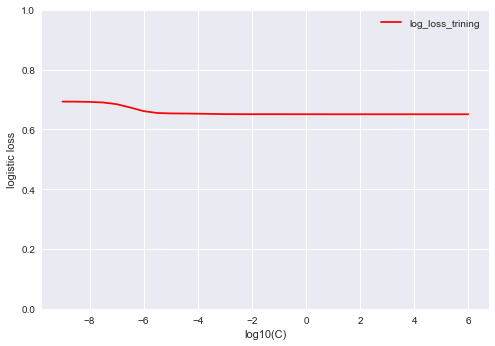

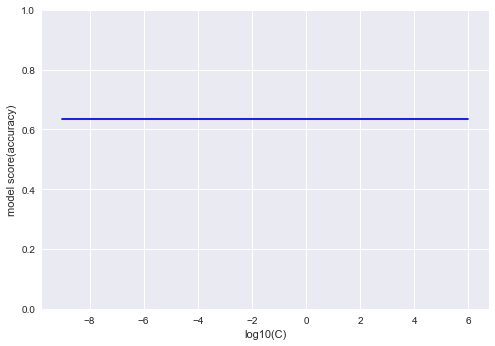

In [24]:
C = np.log10(C_grid)

plt.plot(C,tr_loss_list,color='red',label='log_loss_trining')
#plt.plot(C,va_loss_list,color='blue',label='Validation')
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1.0]);
plt.legend()

plt.figure()
plt.plot(C,tr_score_list,color='blue',label='score_training')
#plt.plot(C,va_loss_list,color='blue',label='Validation')
plt.xlabel('log10(C)');
plt.ylabel('model score(accuracy)');
plt.ylim([0.0, 1.0]);
#print("Best C-value for LR with 2-feature data: %.3f" % C_grid[tr_c])

### Find correlation by linear(polynomial regression)

Apply linear(and polynimial) regression on:  
years of exp **VS** compensation (women)  
years of exp **VS** compensation (men)   
  
Then visualize the result.

In [25]:
# import libraries as needed

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [26]:
other = df.loc[df['gender']=='Other']
other = other.groupby('yearsofexperience',as_index = False)['totalyearlycompensation'].mean()

noinfo = df.loc[df['gender']=='no info']
noinfo = noinfo.groupby('yearsofexperience',as_index = False)['totalyearlycompensation'].mean()

In [27]:
np.shape(women)

(32, 2)

In [28]:
women_exp = women.iloc[:, :-1].values
women_compen = women.iloc[:, 1].values

men_exp = men.iloc[:, :-1].values
men_compen = men.iloc[:, 1].values

other_exp = other.iloc[:,:-1].values
other_compen = other.iloc[:, 1].values

noinfo_exp = noinfo.iloc[:,:-1].values
noinfo_compen = noinfo.iloc[:, 1].values

(0.0, 500.0)

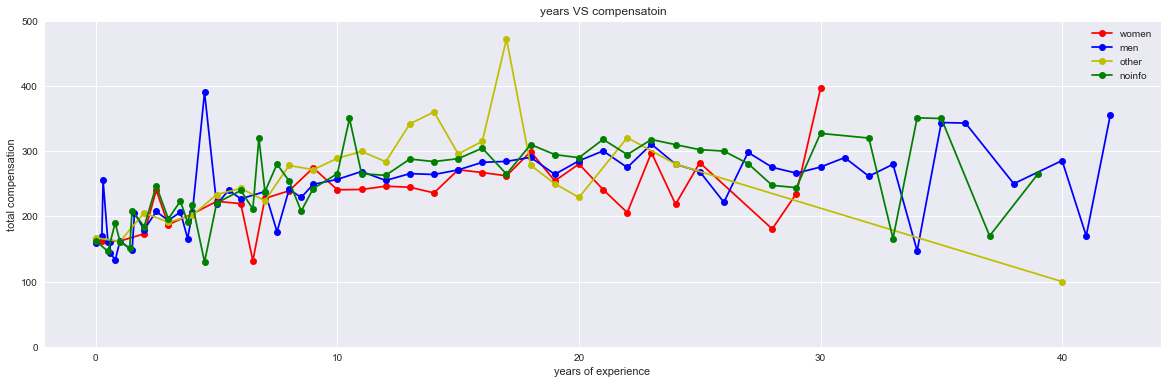

In [29]:
plt.figure(figsize=(20,6))
plt.plot(women_exp,women_compen,label='women', color='r', marker='o')
plt.plot(men_exp,men_compen,label='men', color='b', marker='o')
plt.plot(other_exp,other_compen,label='other', color='y', marker='o')
plt.plot(noinfo_exp,noinfo_compen,label='noinfo', color='g', marker='o')
plt.legend()
plt.title("years VS compensatoin")
plt.xlabel("years of experience ")
plt.ylabel("total compensation")
plt.ylim((0,500))

### For Women

In [30]:
import math

In [31]:
def plot_predictions(x, y, polynomials=list(), prediction_list=list(), error_list=list()):
    length = len(prediction_list)
    grid_size = int(math.sqrt(length))
    if not (length == len(polynomials) and length == len(error_list)):
        raise ValueError("Input lists must be of same length")
    if not length == (grid_size * grid_size):
        raise ValueError("Need a square number of list items (%d given)" % (length))
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize =(14,14), sharey=True)
    for subplot_id, prediction in enumerate(prediction_list):
        # order data for display
        data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
        data_frame = data_frame.sort_values(by=0)
        x_sorted = data_frame.iloc[:, :-1].values
        prediction_sorted = data_frame.iloc[:, 1].values

        ax = axs.flat[subplot_id]
        ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
        ax.plot(x, y, 'r.')
        ax.plot(x_sorted, prediction_sorted, color='blue')
        
    plt.show()

In [32]:
def test_polynomials(x, y, polynomials=list()):
    
    prediction_list = list()
    error_list = list()
    
    for d in polynomials:
        poly = PolynomialFeatures(degree=d) 
        x_T = poly.fit_transform(x)
        linearRegression = LinearRegression()
        linearRegression.fit(x_T, y)
        yPredict = linearRegression.predict(x_T)
        #print(yPredict[i-1])
        error = mean_squared_error(y, yPredict) / max(y)
        #print(error[i-1])
        prediction_list.append(yPredict)
        error_list.append(error)

        
    #return yPredict,error
    return prediction_list, error_list


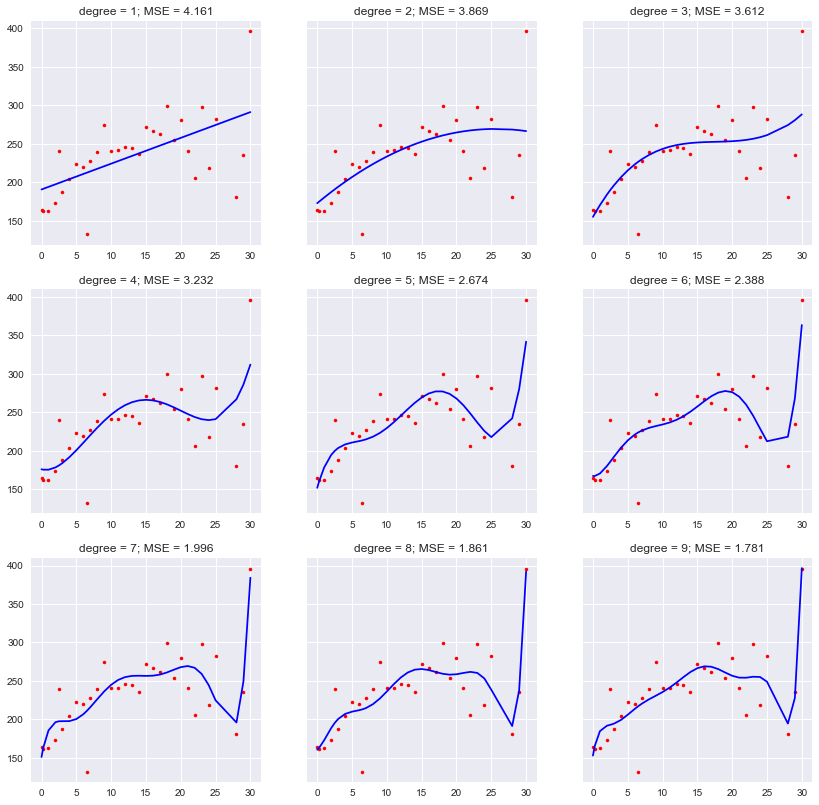

In [33]:
degrees = (1,2,3,4,5,6,7,8,9)
predict_of_y,error_of_y = test_polynomials(women_exp, women_compen, degrees)
plot_predictions(women_exp, women_compen, list(degrees), list(predict_of_y), list(error_of_y))


### For Men

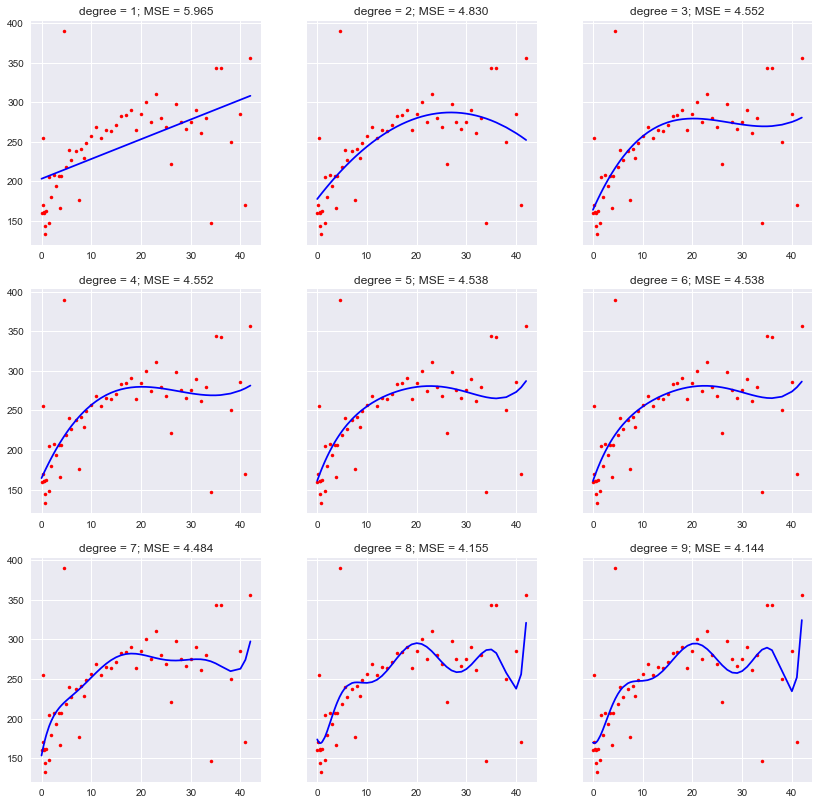

In [34]:
predict_of_y_men,error_of_y_men = test_polynomials(men_exp, men_compen, degrees)
plot_predictions(men_exp, men_compen, list(degrees), list(predict_of_y_men), list(error_of_y_men))


### For Other people

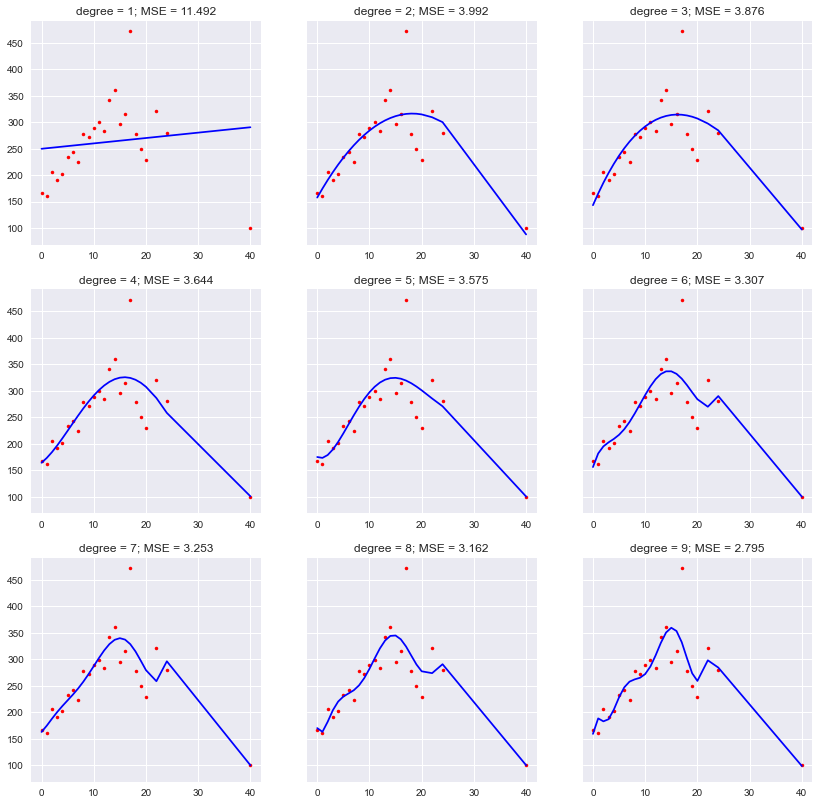

In [35]:
predict_of_y_other, error_of_y_other = test_polynomials(other_exp, other_compen, degrees)
plot_predictions(other_exp, other_compen, list(degrees), list(predict_of_y_other), list(error_of_y_other))


### For people with no info

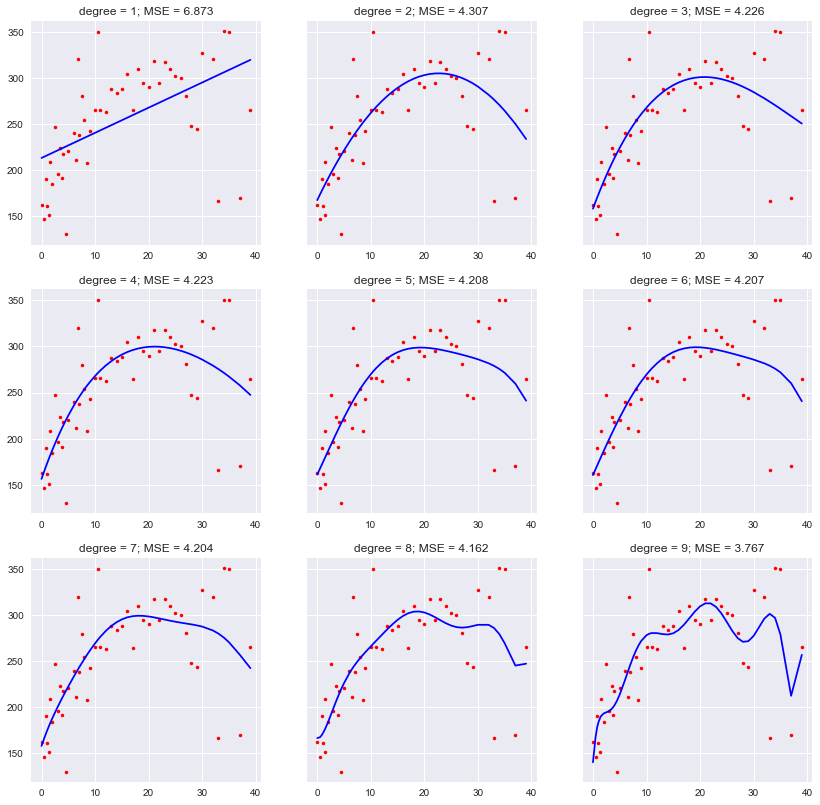

In [36]:
predict_of_y_noinfo, error_of_y_noinfo = test_polynomials(noinfo_exp, noinfo_compen, degrees)
plot_predictions(noinfo_exp, noinfo_compen, list(degrees), list(predict_of_y_noinfo), list(error_of_y_noinfo))


In [37]:
# Placing all levels in one row, separated by a comma
levelsdf = df[['company','level']].sort_values('company', ascending=True)
levelsdf.drop_duplicates(subset='level', keep='first', inplace=True)
df2 = (df.groupby('company')['level'].apply(lambda x: list(set(x))).reset_index())
print(df2.head(50))

                 company                                              level
0                     3M                                           [T3, T2]
1                    ADP  [Lead, Principal Application Developer, Senior...
2                 AMAZON                                                [4]
3                    AMD  [PMTS, Sr. Staff, 8, SMTS, L3, Senior, Softwar...
4                 AMazon                                                [5]
5                  APPLE                                             [ICT4]
6                    ARM                                               [G4]
7                   ASML                                  [7, 8, 9, Senior]
8                   AT&T  [Principal, Software Engineer 1, Technology De...
9                    AWS                                 [5, L5, L6, 6, L7]
10             Accenture  [L9 Consultant, 7, Principal Consultant, L6, 6...
11                 Adobe  [L3, SDE3, Senior Software Engineer (5.5), 2, ...
12          

In [38]:
# Graph that charts years of experience vs job title (only look at SWE to see developement in roles)
# Graph that charts average salary vs job title
duplicate_rows_df = df[df.duplicated()]
# The following statement gave an output of (52,14), however, I had removed duplicate rows earlier, so does this mean that I wanna remove these duplicates or not?
print ("number of duplicate rows: ", duplicate_rows_df.shape)
duplicated_rows_df_imdb_link = df[df.duplicated(['level'])]
print (duplicated_rows_df_imdb_link.shape)

number of duplicate rows:  (42, 14)
(21164, 14)


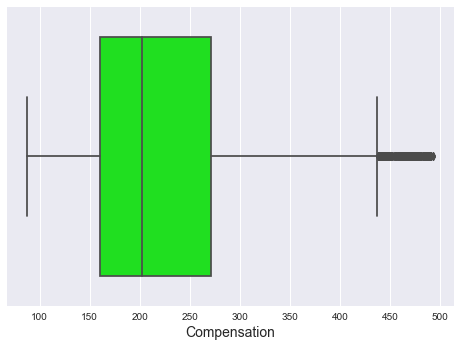

level                       L5
totalyearlycompensation    225
Name: 14951, dtype: object


In [39]:
sns.boxplot(x=df['totalyearlycompensation'], color='lime')
plt.xlabel('Compensation', fontsize=14)
plt.show()
# the following statement shows that the maximum compensation was for the role of SVP at Amazon, 5000
print (df[['level', 'totalyearlycompensation']].iloc[df['totalyearlycompensation'].idxmax()])


In [40]:
# Converting all string columns to uppercase
df.columns = df.columns.str.upper()
df['COMPANY'] = df['COMPANY'].str.upper()
df['LEVEL'] = df['LEVEL'].str.upper()
df['TITLE'] = df['TITLE'].str.upper()
df['LOCATION'] = df['LOCATION'].str.upper()
df['TAG'] = df['TAG'].str.upper()
df['GENDER'] = df['GENDER'].str.upper()
df['OTHERDETAILS'] = df['OTHERDETAILS'].str.upper()
df.head(50)


,TIMESTAMP,COMPANY,LEVEL,TITLE,TOTALYEARLYCOMPENSATION,LOCATION,YEARSOFEXPERIENCE,YEARSATCOMPANY,TAG,BASESALARY,STOCKGRANTVALUE,BONUS,GENDER,OTHERDETAILS
0,2017-06-07 11:33:27,ORACLE,L3,PRODUCT MANAGER,127.0,"REDWOOD CITY, CA",1.5,1.5,NO INFO,107.0,20.0,10.0,NO INFO,NO INFO
1,2017-06-10 17:11:29,EBAY,SE 2,SOFTWARE ENGINEER,100.0,"SAN FRANCISCO, CA",5.0,3.0,NO INFO,0.0,0.0,0.0,NO INFO,NO INFO
2,2017-06-11 14:53:57,AMAZON,L7,PRODUCT MANAGER,310.0,"SEATTLE, WA",8.0,0.0,NO INFO,155.0,0.0,0.0,NO INFO,NO INFO
4,2017-06-14 21:22:25,MICROSOFT,64,SOFTWARE ENGINEERING MANAGER,200.0,"REDMOND, WA",9.0,9.0,NO INFO,169000.0,100000.0,30000.0,NO INFO,NO INFO
5,2017-06-16 10:44:01,AMAZON,L5,SOFTWARE ENGINEER,173.0,"VANCOUVER, BC, CANADA",11.0,1.0,NO INFO,120000.0,0.0,53000.0,NO INFO,NO INFO
6,2017-06-17 00:23:14,APPLE,M1,SOFTWARE ENGINEERING MANAGER,372.0,"SUNNYVALE, CA",7.0,5.0,NO INFO,157.0,180.0,35.0,NO INFO,NO INFO
7,2017-06-18 23:37:21,FACEBOOK,E4,SOFTWARE ENGINEER,270.0,"MENLO PARK, CA",3.5,2.0,NO INFO,160.0,0.0,0.0,NO INFO,NO INFO
8,2017-06-20 10:58:51,MICROSOFT,60,SOFTWARE ENGINEER,157.0,"MOUNTAIN VIEW, CA",5.0,3.0,NO INFO,0.0,0.0,0.0,NO INFO,NO INFO
9,2017-06-20 18:49:59,AMAZON,L5,SOFTWARE ENGINEER,190.0,"SEATTLE, WA",3.0,3.0,NO INFO,110000.0,80000.0,0.0,NO INFO,NO INFO
10,2017-06-21 17:27:47,MICROSOFT,63,SOFTWARE ENGINEER,208.0,"SEATTLE, WA",8.5,8.5,NO INFO,0.0,0.0,0.0,NO INFO,NO INFO


In [41]:
print ("data types: \n", df.dtypes)
print ("shape before :", df.shape)
df_num = df.select_dtypes(exclude=['object'])
print ("shape after excluding object columns: ", df_num.shape)

data types: 
 TIMESTAMP                  datetime64[ns]
COMPANY                            object
LEVEL                              object
TITLE                              object
TOTALYEARLYCOMPENSATION           float64
LOCATION                           object
YEARSOFEXPERIENCE                 float64
YEARSATCOMPANY                    float64
TAG                                object
BASESALARY                        float64
STOCKGRANTVALUE                   float64
BONUS                             float64
GENDER                             object
OTHERDETAILS                       object
dtype: object
shape before : (22467, 14)
shape after excluding object columns:  (22467, 7)


In [42]:
# Removing outliers
'''
df_Zscore = df_num[(np.abs(stats.zscore(df_num))<3).all(axis=1)]
print ("shape after rejecting outliers: ", df_Zscore.shape)
sns.boxplot(x=df_Zscore['totalyearlycompensation'], color='lime')
plt.xlabel('Compensation', fontsize=14)
plt.show()'''


'\ndf_Zscore = df_num[(np.abs(stats.zscore(df_num))<3).all(axis=1)]\nprint ("shape after rejecting outliers: ", df_Zscore.shape)\nsns.boxplot(x=df_Zscore[\'totalyearlycompensation\'], color=\'lime\')\nplt.xlabel(\'Compensation\', fontsize=14)\nplt.show()'

In [43]:
df.pivot_table(index=['TITLE'], aggfunc='size')>50

TITLE
DATA SCIENTIST                  True
HARDWARE ENGINEER               True
MANAGEMENT CONSULTANT           True
PRODUCT DESIGNER                True
PRODUCT MANAGER                 True
SOFTWARE ENGINEER               True
SOFTWARE ENGINEERING MANAGER    True
SOLUTION ARCHITECT              True
TECHNICAL PROGRAM MANAGER       True
dtype: bool

### Salary Prediction -- Polynomial Regression -- For Amazon

In [44]:
df

,TIMESTAMP,COMPANY,LEVEL,TITLE,TOTALYEARLYCOMPENSATION,LOCATION,YEARSOFEXPERIENCE,YEARSATCOMPANY,TAG,BASESALARY,STOCKGRANTVALUE,BONUS,GENDER,OTHERDETAILS
0,2017-06-07 11:33:27,ORACLE,L3,PRODUCT MANAGER,127.0,"REDWOOD CITY, CA",1.5,1.5,NO INFO,107.0,20.0,10.0,NO INFO,NO INFO
1,2017-06-10 17:11:29,EBAY,SE 2,SOFTWARE ENGINEER,100.0,"SAN FRANCISCO, CA",5.0,3.0,NO INFO,0.0,0.0,0.0,NO INFO,NO INFO
2,2017-06-11 14:53:57,AMAZON,L7,PRODUCT MANAGER,310.0,"SEATTLE, WA",8.0,0.0,NO INFO,155.0,0.0,0.0,NO INFO,NO INFO
4,2017-06-14 21:22:25,MICROSOFT,64,SOFTWARE ENGINEERING MANAGER,200.0,"REDMOND, WA",9.0,9.0,NO INFO,169000.0,100000.0,30000.0,NO INFO,NO INFO
5,2017-06-16 10:44:01,AMAZON,L5,SOFTWARE ENGINEER,173.0,"VANCOUVER, BC, CANADA",11.0,1.0,NO INFO,120000.0,0.0,53000.0,NO INFO,NO INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,2020-07-30 11:57:48,SHOPIFY,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,145.0,"NEW YORK, NY",2.0,0.0,WEB DEVELOPMENT (FRONT-END),120.0,25.0,0.0,FEMALE,"REMOTE, RACE: WHITE, ACADEMIC LEVEL: BACHELOR’..."
24947,2020-07-30 12:19:09,TWITCH,L4,SOFTWARE ENGINEER,140.0,"LOS ANGELES, CA",8.0,2.0,FULL STACK,140.0,0.0,0.0,NO INFO,NO INFO
24948,2020-07-30 12:28:37,ORACLE,IC-2,SOFTWARE ENGINEER,220.0,"SEATTLE, WA",4.0,2.0,DISTRIBUTED SYSTEMS (BACK-END),135.0,75.0,10.0,MALE,"RACE: ASIAN, ACADEMIC LEVEL: MASTER’S DEGREE"
24949,2020-07-30 12:34:53,BYTEDANCE,2-2,SOFTWARE ENGINEER,400.0,"MOUNTAIN VIEW, CA",7.0,0.0,ML / AI,200.0,150.0,50.0,NO INFO,NO INFO


In [45]:
# Inputs
years_exp = df['YEARSOFEXPERIENCE'] #Numbers
years_atcomp = df['YEARSATCOMPANY'] #Numbers

level = df['LEVEL'] #Words
company = df['COMPANY'] #Words
job_title = df['TITLE'] #Words
location = df['LOCATION'] #Words


In [46]:
#Outputs
bonus = df['BONUS'] #Numbers
base_salary = df['BASESALARY'] #Numbers
compensation = df['TOTALYEARLYCOMPENSATION'] #Numbers

In [47]:
years_atcomp

0        1.5
1        3.0
2        0.0
4        9.0
5        1.0
        ... 
24946    0.0
24947    2.0
24948    2.0
24949    0.0
24950    0.0
Name: YEARSATCOMPANY, Length: 22467, dtype: float64

In [48]:
Amazon_year_exp = df.loc[df['COMPANY']=='AMAZON']
Amazon_year_exp = Amazon_year_exp.groupby('YEARSOFEXPERIENCE',as_index = False)['BASESALARY'].mean()

In [49]:
Amazon_year_exp

,YEARSOFEXPERIENCE,BASESALARY
0,0.0,1953.595318
1,0.5,55000.000000
2,0.6,108000.000000
3,0.8,104500.000000
4,1.0,3804.827309
5,1.4,107000.000000
6,2.0,4677.300000
7,2.5,96907.750000
8,3.0,6601.973988
9,3.8,134.500000


In [51]:
#Amazon_yearatcomp

In [52]:
Amazon_yearatcomp = df.loc[df['COMPANY']=='AMAZON']
Amazon_yearatcomp = Amazon_yearatcomp.groupby('YEARSATCOMPANY',as_index = False)['BASESALARY'].mean()

In [53]:
Amazon_yearatcomp = Amazon_yearatcomp.drop(index = [8,45])

In [54]:
years_exp = Amazon_year_exp.iloc[:, :-1].values
years_atcomp = Amazon_yearatcomp.iloc[:, :-1].values
base_salary_1 = Amazon_year_exp.iloc[:, 1].values
base_salary_2 = Amazon_yearatcomp.iloc[:, 1].values

In [55]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'base salary')

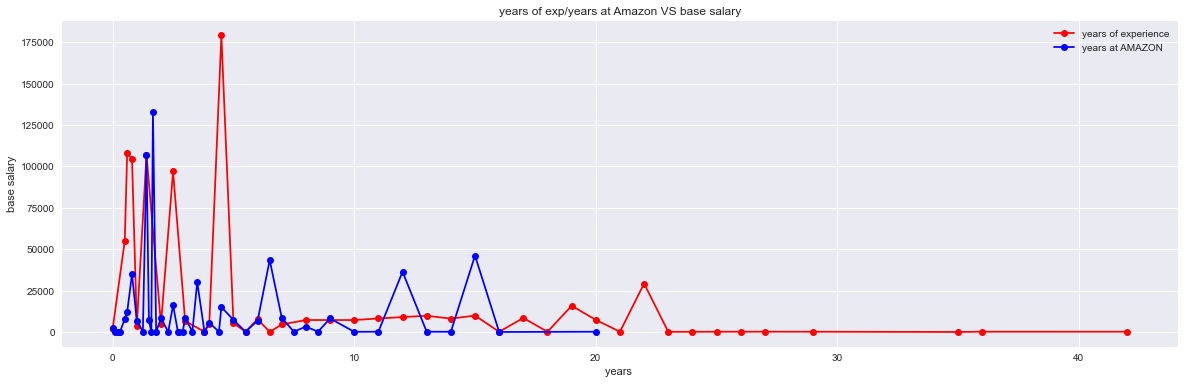

In [56]:
plt.figure(figsize=(20,6))
plt.plot(years_exp,base_salary_1,label='years of experience', color='r', marker='o')
plt.plot(years_atcomp,base_salary_2,label='years at AMAZON', color='b', marker='o')
plt.legend()
plt.title("years of exp/years at Amazon VS base salary")
plt.xlabel("years ")
plt.ylabel("base salary")

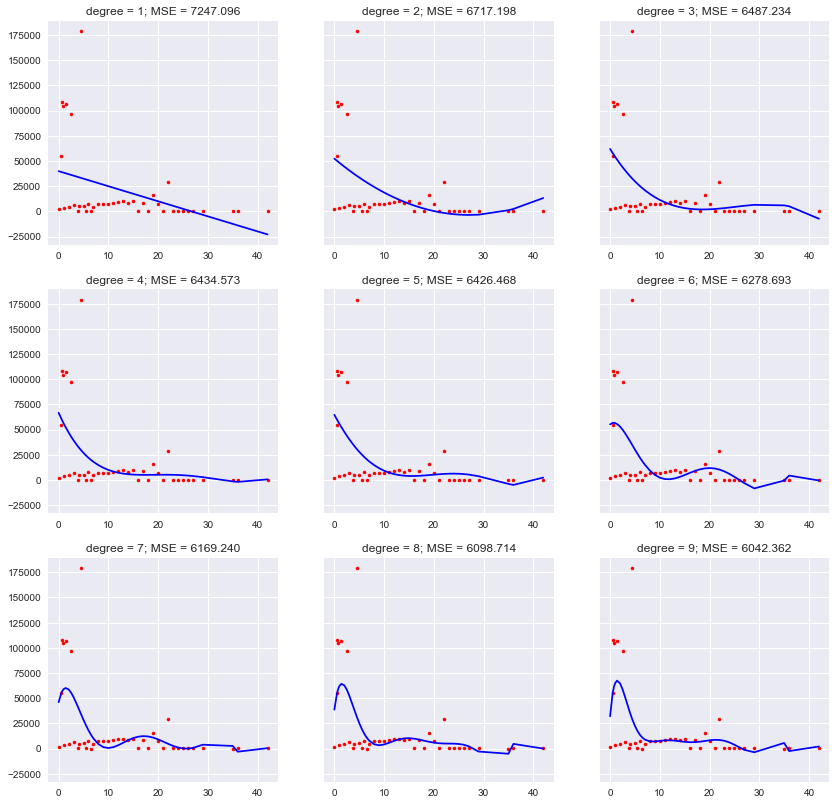

In [57]:
degrees = (1,2,3,4,5,6,7,8,9)
predict_of_y,error_of_y = test_polynomials(years_exp, base_salary_1, degrees)
plot_predictions(years_exp, base_salary_1, list(degrees), list(predict_of_y), list(error_of_y))


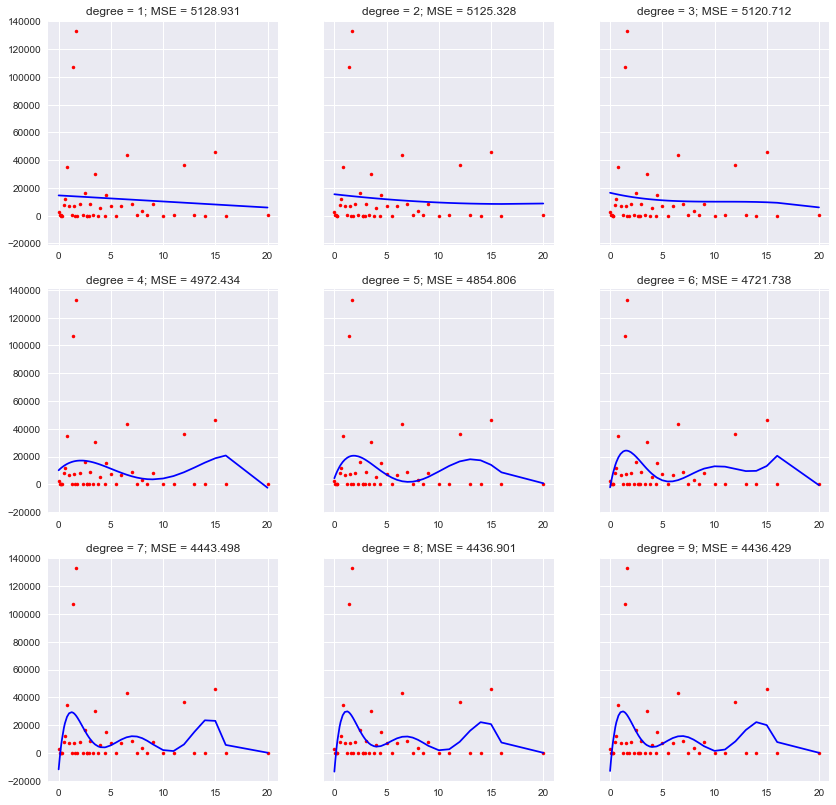

In [58]:
degrees = (1,2,3,4,5,6,7,8,9)
predict_of_y,error_of_y = test_polynomials(years_atcomp, base_salary_2, degrees)
plot_predictions(years_atcomp, base_salary_2, list(degrees), list(predict_of_y), list(error_of_y))


####  ↑↑↑ Withoud considering about differenced of job titles, maybe Amazon prefer young people.↑↑↑  
  
-------------------   

### Looking at job titles

In [59]:
pd.set_option('display.max_rows', 500)  #最大行数
pd.set_option('display.max_columns', 500)    #最大列数
pd.set_option('display.width', 4000)        #页面宽度

In [60]:
soft_engi_atcomp_1 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_atcomp_1 = soft_engi_atcomp_1.groupby('YEARSATCOMPANY',as_index = False)['BASESALARY'].mean()
soft_engi_atcomp_1.drop(index = [12])

,YEARSATCOMPANY,BASESALARY
0,0.000,3507.238028
1,0.100,16282.307692
2,0.200,160.800000
3,0.250,125.857143
4,0.300,106.333333
5,0.330,115.000000
6,0.400,65.000000
7,0.500,8328.698413
8,0.580,128.000000
9,0.600,1209.909091


In [61]:
x = soft_engi_atcomp_1.iloc[:, :-1].values
y = soft_engi_atcomp_1.iloc[:, 1].values

No handles with labels found to put in legend.


Text(0, 0.5, 'base salary')

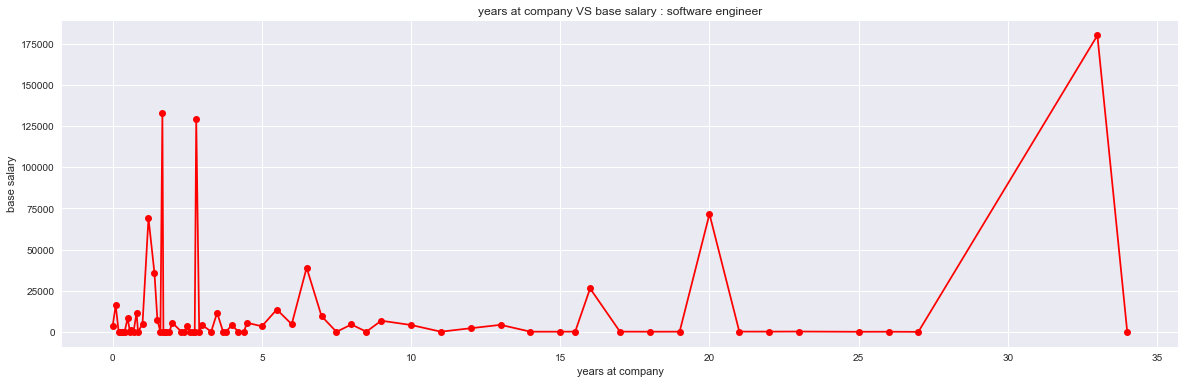

In [62]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')
#plt.plot(years_atcomp,base_salary_2,label='years at AMAZON', color='b', marker='o')
plt.legend()
plt.title("years at company VS base salary : software engineer")
plt.xlabel("years at company")
plt.ylabel("base salary")

In [63]:
soft_engi_atcomp_2 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_atcomp_2 = soft_engi_atcomp_2.groupby('YEARSATCOMPANY',as_index = False)['BONUS'].mean()
soft_engi_atcomp_2.drop(index = [12,18,21,24,28,29,31,33,39,65,68])

,YEARSATCOMPANY,BONUS
0,0.00,610.609491
1,0.10,2402.846154
2,0.20,6.400000
3,0.25,18.785714
4,0.30,22.333333
5,0.33,22.500000
6,0.40,9.000000
7,0.50,1533.190476
8,0.58,19.200000
9,0.60,1832.545455


In [64]:
x = soft_engi_atcomp_2.iloc[:, :-1].values
y = soft_engi_atcomp_2.iloc[:, 1].values

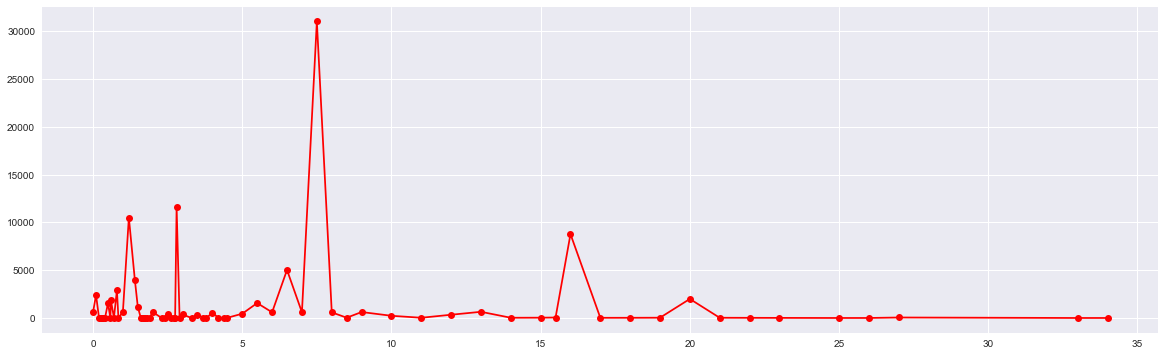

In [65]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')

In [66]:
soft_engi_atcomp_3 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_atcomp_3 = soft_engi_atcomp_3.groupby('YEARSATCOMPANY',as_index = False)['TOTALYEARLYCOMPENSATION'].mean()
soft_engi_atcomp_3

,YEARSATCOMPANY,TOTALYEARLYCOMPENSATION
0,0.000,208.292795
1,0.100,199.769231
2,0.200,231.800000
3,0.250,177.238095
4,0.300,174.666667
5,0.330,165.500000
6,0.400,282.500000
7,0.500,189.293651
8,0.580,160.500000
9,0.600,183.363636


In [67]:
x = soft_engi_atcomp_3.iloc[:, :-1].values
y = soft_engi_atcomp_3.iloc[:, 1].values

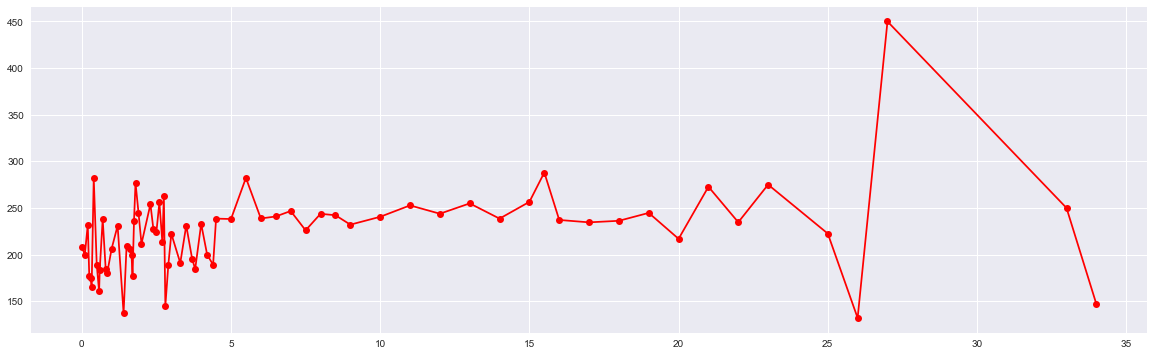

In [68]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')

In [69]:
soft_engi_exp_1 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_exp_1 = soft_engi_exp_1.groupby('YEARSOFEXPERIENCE',as_index = False)['BASESALARY'].mean()
soft_engi_exp_1.drop(index = [55])

,YEARSOFEXPERIENCE,BASESALARY
0,0.00,2889.445580
1,0.25,116.500000
2,0.30,130.000000
3,0.50,52151.750000
4,0.58,128.000000
5,0.60,108000.000000
6,0.80,52310.000000
7,1.00,3330.379297
8,1.40,107000.000000
9,1.50,20117.142857


In [70]:
x = soft_engi_exp_1.iloc[:, :-1].values
y = soft_engi_exp_1.iloc[:, 1].values

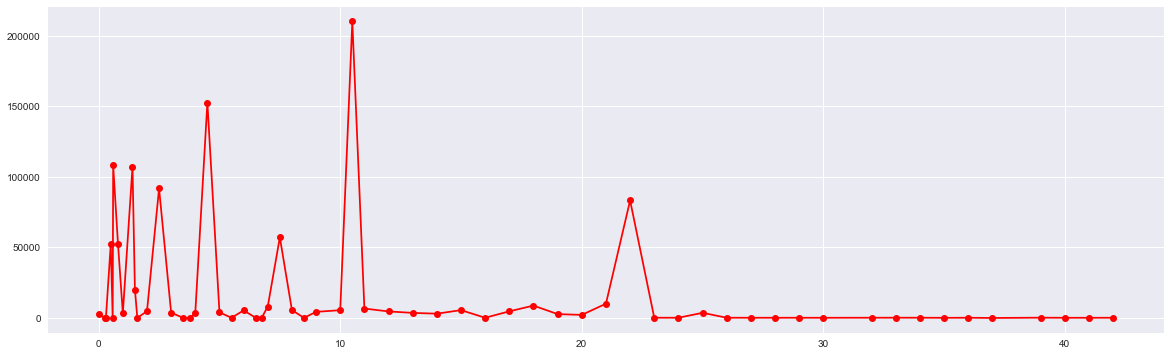

In [71]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')

In [72]:
soft_engi_exp_2 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_exp_2 = soft_engi_exp_2.groupby('YEARSOFEXPERIENCE',as_index = False)['BONUS'].mean()
soft_engi_exp_2.drop(index = [5,15,50,54,55,56,59])

,YEARSOFEXPERIENCE,BONUS
0,0.00,476.969633
1,0.25,23.000000
2,0.30,65.000000
3,0.50,12502.500000
4,0.58,19.200000
6,0.80,13010.000000
7,1.00,359.622656
8,1.40,12000.000000
9,1.50,2006.714286
10,1.60,21.000000


In [73]:
x = soft_engi_exp_2.iloc[:, :-1].values
y = soft_engi_exp_2.iloc[:, 1].values

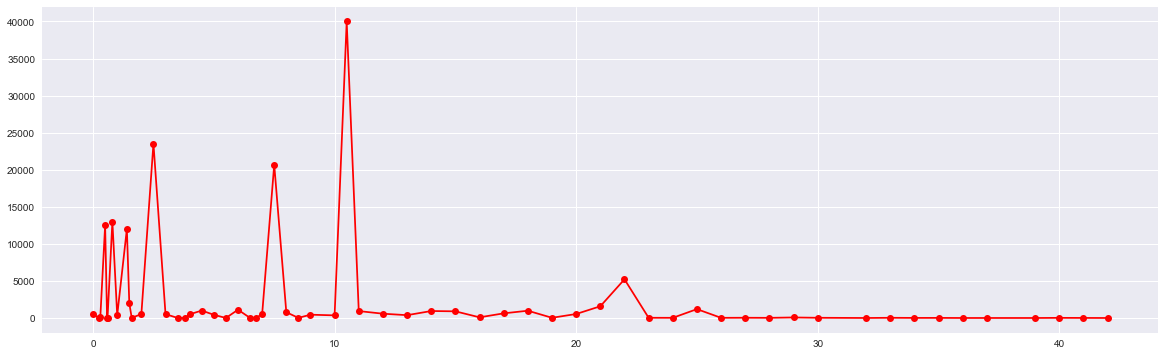

In [74]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')

In [75]:
soft_engi_exp_3 = df.loc[df['TITLE']=='SOFTWARE ENGINEER']
soft_engi_exp_3 = soft_engi_exp_3.groupby('YEARSOFEXPERIENCE',as_index = False)['TOTALYEARLYCOMPENSATION'].mean()
soft_engi_exp_3

,YEARSOFEXPERIENCE,TOTALYEARLYCOMPENSATION
0,0.00,160.588244
1,0.25,166.000000
2,0.30,255.000000
3,0.50,150.000000
4,0.58,160.500000
5,0.60,144.000000
6,0.80,161.500000
7,1.00,162.242969
8,1.40,151.000000
9,1.50,185.678571


In [76]:
x = soft_engi_exp_3.iloc[:, :-1].values
y = soft_engi_exp_3.iloc[:, 1].values

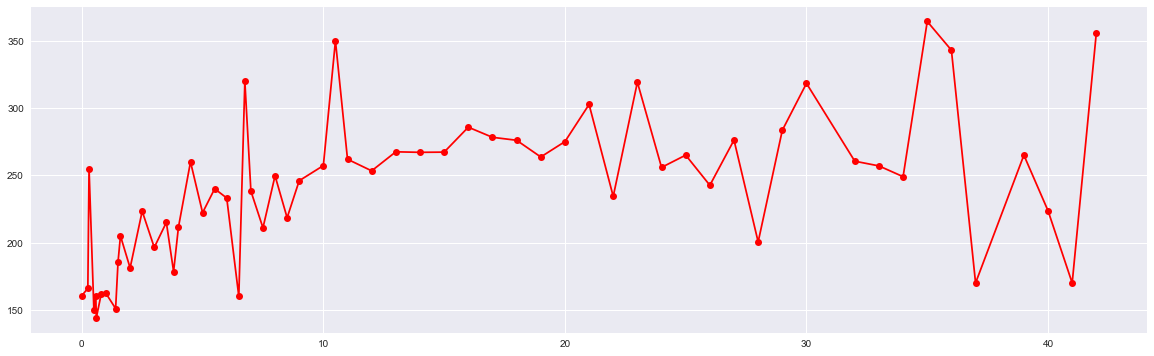

In [77]:
plt.figure(figsize=(20,6))
plt.plot(x,y,label='', color='r', marker='o')